# Analysis on Data Jobs

Motivation and Questions
* What are the salary levels?
* Where are the job opportunities?
* What kind of college degree do you need?
* What are the most popular languages?

## 1. Read Data

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
df_ds = pd.read_csv('DataScientist.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_da = pd.read_csv('DataAnalyst.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_de = pd.read_csv('DataEngineer.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_ba = pd.read_csv('BusinessAnalyst.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])


df_ba.drop(['Unnamed: 0','index'],axis=1, inplace=True)
df_ds.drop(['Unnamed: 0','index'],axis=1, inplace=True)
df_da.drop(['Unnamed: 0'],axis=1, inplace=True)

df_ba = df_ba.head(3692)

df_ds['Job Category'] = 'Data Scientist'
df_da['Job Category'] = 'Data Analyst'
df_de['Job Category'] = 'Data Engineer'
df_ba['Job Category'] = 'Business Analyst'

df = pd.concat([df_ds, df_da, df_de, df_ba])
df = df.drop_duplicates(subset=['Job Description'])
df.reset_index(drop=True, inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Job Category
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,NaN,NaN,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,NaN,NaN,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,NaN,NaN,NaN,NaN,NaN,True,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",NaN,Data Scientist
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",NaN,Data Scientist


In [164]:
df.shape

(10168, 16)

In [165]:
# Prportion of nulls in each field
df.isnull().mean().sort_values(ascending=False)

Easy Apply           0.958891
Competitors          0.722954
Revenue              0.327596
Founded              0.258458
Industry             0.139949
Sector               0.139654
Rating               0.098249
Size                 0.077400
Type of ownership    0.065795
Headquarters         0.058320
Salary Estimate      0.000098
Company Name         0.000098
Job Title            0.000000
Job Description      0.000000
Location             0.000000
Job Category         0.000000
dtype: float64

## 2. Clean Data
Clean the following fields
* Job Category - Adjust job category per job title
* Salary Estimate - Convert Per Hour salary to Anual Salary; Convert salary range to mean salary
* Location - Break down to State and City; Keep US states only
* Job Description - Remove '/n' in text

In [166]:
df.loc[df['Job Title'].str.lower().str.contains('data scientist'),'Job Category'] = 'Data Scientist'
df.loc[df['Job Title'].str.lower().str.contains('business analyst'),'Job Category'] = 'Business Analyst'
df.loc[df['Job Title'].str.lower().str.contains('data analyst'),'Job Category'] = 'Data Analyst'
df.loc[df['Job Title'].str.lower().str.contains('data engineer'),'Job Category'] = 'Data Engineer'

df['Job Category'].value_counts()

Business Analyst    3197
Data Engineer       2413
Data Analyst        2309
Data Scientist      2249
Name: Job Category, dtype: int64

In [167]:
# Parse salary range to lower bound and upper bound
df_salary = df["Salary Estimate"].str.extract(r'([\d]+)([K$-]*)([\d]+)')

# Calculate mean salary
df['Average Salary'] = (df_salary[0].astype(float) + df_salary[2].astype(float)) / 2

# Convert Per Hour rate to annual salary
is_per_hour = ~df_salary[1].str.contains('K').astype(bool)
df['Average Salary'].loc[is_per_hour] *= 40*52/1000 # 40 hrs per week, 52 weeks a year

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [169]:
# Location break down to State and City
df['Location'] = df['Location'].str.replace('Greenwood Village, Arapahoe','Arapahoe')
df['Location'] = df['Location'].str.replace('Santa Fe Springs, Los Angeles','Los Angeles')

df_location = df['Location'].str.split(',',expand=True)
df_location.columns = ['City','State']
df_location['State'] = df_location['State'].str.strip()
df = pd.concat([df,df_location],axis=1)

# Keep US states only
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
df = df[df['State'].isin(states)]

In [192]:
# Clean job descriptions
df['Job Description'] = df['Job Description'].str.replace('\n',' ')

In [193]:
df = df[['Job Category','Average Salary','State','Sector','Job Description']]
df.head()

,Job Category,Average Salary,State,Sector,Job Description
0,Data Scientist,146.0,NY,Travel & Tourism,"ABOUT HOPPER At Hopper, we’re on a mission to..."
1,Data Scientist,146.0,NY,Consumer Services,"At Noom, we use scientifically proven methods ..."
2,Data Scientist,146.0,NY,NaN,Decode_M https://www.decode-m.com/ Data Scie...
3,Data Analyst,146.0,NJ,Information Technology,Sapphire Digital seeks a dynamic and driven mi...
4,Data Scientist,146.0,NY,Business Services,"Director, Data Science - (200537) Description ..."


In [285]:
df.shape

(10164, 6)

## 3. Analysis

### 3.1 What are the salary levels?

In [185]:
salary_medians = df.groupby("Job Category")["Average Salary"].median()
salary_order = salary_medians.index

In [186]:
job_counts = df["Job Category"].value_counts()
job_counts = job_counts[salary_order]
job_counts = [str(x) for x in job_counts]
job_counts = ["n=" + i for i in job_counts]
job_counts

['n=3197', 'n=2308', 'n=2413', 'n=2246']

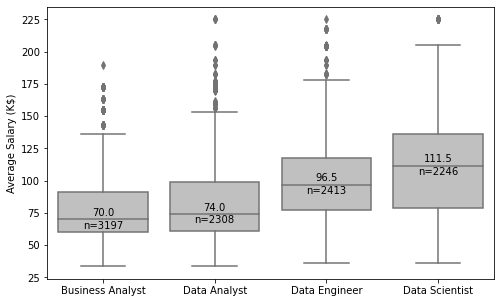

In [187]:
fig, axs = plt.subplots(figsize = [8, 5])
box_plot = sns.boxplot(data=df, x='Job Category', y='Average Salary', color='silver', order = salary_order)
plt.ylabel('Average Salary (K$)')
plt.xlabel('')

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, salary_medians[xtick]+3, salary_medians[xtick], 
            horizontalalignment='center',size='medium',color='black')
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, salary_medians[xtick]-7, job_counts[xtick], 
            horizontalalignment='center',size='medium',color='black')

From the boxplot above, we can see that, Business Analyst and Data Analyst have similar salary with the former slightly lower. Data Engineer has higher salary with median = 96.5K. Data Scientist has the highest salary with median = 111.5K. Business Analyst has the lowest salary with median = 70K but has more job opennings (n=3197).

### 3.2 Where are the job opportunities?

In [188]:
def job_plot(group, color1, color2, size=[12,5]):
    '''
    Makes a barplot for the number of jobs and a pointplot for the average salary 

            Parameters:
                    group (str): The column to group data frame
                    color1 (str): The color for barplot showing the number of jobs per group
                    color2 (str): The color for pointplots showing the average salary per group
                    size (list): The figure size, a list of length by width
    '''
    plt.figure(figsize = size)

    # Plot number of job listings
    counts = df[group].value_counts()
    ax = sns.barplot(x = counts.index.values, y = counts, color=color1)
    plt.xticks(rotation = 90);
    plt.ylabel('Number of job listings')
    # number lable
    for i in range (counts.shape[0]):
        count = counts[i]
        plt.text(i, count+100, count, ha = 'center', va='top', color=color1)
    
    # Plot average salary
    salary_mean = df['Average Salary'].mean()
    salary_by_group = df.groupby(group)['Average Salary'].mean()

    ax2 = ax.twinx()
    sns.pointplot(data=df, 
                  x = group, 
                  y = 'Average Salary', 
                  linestyles="", 
                  dodge = True,
                  order = counts.index,
                  capsize = .2,
                  ax = ax2,
                  color = color2
                  )
    plt.ylabel('Avg. Salary (K$)')

    # salary lable
    for i in range (counts.shape[0]):
        g = counts.index[i]
        salary = salary_by_group[g]
        salary_formatted = int(np.round(salary))
        plt.text(i+0.4, salary, 
                 salary_formatted,
                 ha = 'center', va='center',
                 color = color2)

    # Plot average salary line
    ax2.axhline(salary_mean, color = color2, ls='dashed')

#### 3.2.1 Which industry has more data jobs/pays higher?

In [286]:
salary_mean = df['Average Salary'].mean()
salary_mean

91.99030994785005

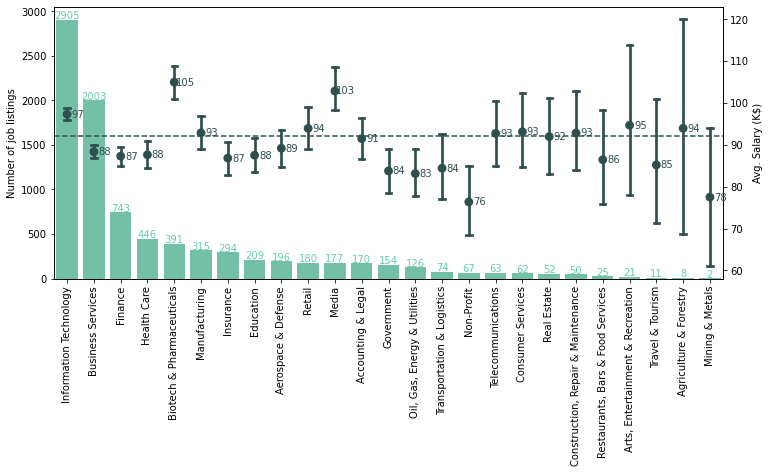

In [189]:
job_plot(group = 'Sector', color1 = 'mediumaquamarine', color2 = 'darkslategray')

From the plot above, we can see that the job opportunities are mostly in IT and Business Services. IT salary level (97K) is higher than the average and Business Services has a lower salary level (88K) than the average. 
Bitech & Pharmaceuticals and Media have much higher salary levels, 105K and 103K respectively, than other industries; but they do not have many job listings as IT and Business Services do.

#### 3.2.2 Which State has more data jobs/pays higher?

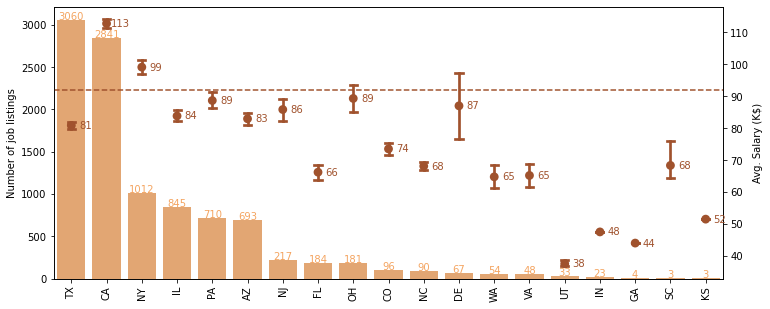

In [190]:
job_plot(group = 'State', color1 = 'sandybrown', color2 = 'sienna')

The chart above shows that the majority of data jobs are located in TX and CA. 
CA seems to be the best state to look for a data job as it has the highest salary level and numerous job opportunities. TX has the most job listings but its salary level is much lower than CA and also below average. However, the difference in salary level is probably due to different cost of living in each state. 

### 3.3 What are the degree requriements?

In [195]:
# Extract degrees from job description
bachelor = ['bachelor','bsc','b.eng','b.sc']
master = ['master','msc','m.sc','m.eng','advanced degree']
doctor = ['doctor','phd','doctorate','ph.d']

df['Degree']="Unspecified"
for i in df.index:
    if any(word in df['Job Description'][i].lower() for word in bachelor):
        df.loc[i,'Degree'] = 'Bachelor'
    elif any(word in df['Job Description'][i].lower() for word in master):
        df.loc[i, 'Degree'] = 'Master'
    elif any(word in df['Job Description'][i].lower() for word in doctor):
        df.loc[i, 'Degree'] = 'PhD'

In [196]:
df['Degree'].value_counts()

Bachelor       4520
Unspecified    4029
Master         1081
PhD             534
Name: Degree, dtype: int64

In [212]:
# Data processing
job_degree_counts = df.groupby(['Job Category','Degree']).size().reset_index().rename(columns={0:'Counts'})

job_counts = pd.DataFrame(df['Job Category'].value_counts())
job_counts.columns = ['Total']

job_degree_counts['Total']=None
for i in job_counts.index:
    job_degree_counts.loc[job_degree_counts['Job Category']==i,'Total'] = job_counts['Total'][i]

job_degree_counts['Percentage'] = job_degree_counts['Counts']/job_degree_counts['Total']

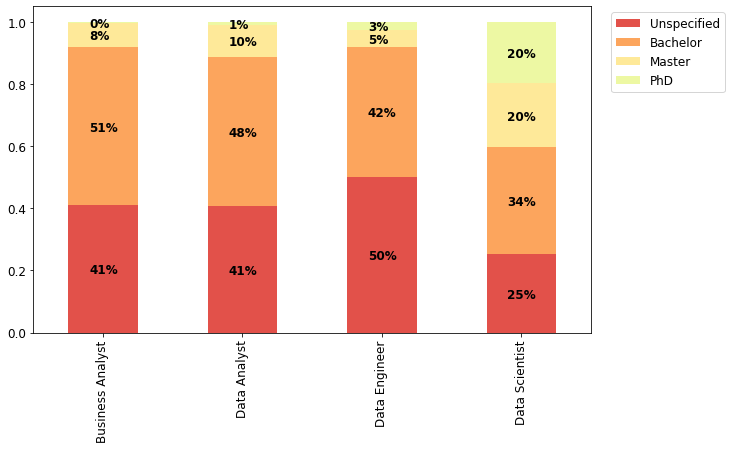

In [282]:
# Visualization
job_degree_pivot = pd.pivot_table(job_degree_counts, values = 'Percentage', index='Job Category', columns = 'Degree')

ordered_degree = ['Unspecified','Bachelor','Master','PhD']
job_degree_pivot = job_degree_pivot[ordered_degree]

sns.set_palette("Spectral")
job_degree_pivot.plot(
    kind = 'bar',
    stacked = True,
    #title = 'Degree Requirement',
    fontsize=12,
    figsize=(10, 6));

plt.xlabel("")
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', ncol=1,fontsize=12)

for n, job in enumerate([*job_degree_pivot.index.values]):
    for (p, y_loc) in zip(job_degree_pivot.loc[job], 
                          job_degree_pivot.loc[job].cumsum()):           
        plt.text(x=n-0.1,
                 y=y_loc-p/2-0.015,
                 s=f'{int(np.round(p * 100, 0))}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

When we look at the requirement on degrees, Business Analyst, Data Analyst, and Data Engineer are similar - only half of the job listings mentioned the degree required; when they do require a degree, more than 80% require a Bachelor degree, and very few require an advanced degree.
Data Scientist is noticeably different than the other 3 job categories. 75% of job listings on Data Scientist would specify the degree required. Requirement of advanced degrees are more common in Data Scientist job listings. 

### 3.4 Which are the most popular programming languages?

In [200]:
def get_keyword_freq(df, job_category, keywords_dict, case_sensitive=True):
    '''
    Counts how many times the keywords appear in job descriptions.

            Parameters:
                    df (dataframe): The dataframe containing job categories and job descriptions
                    job_category(str): The job category to analyze
                    keywords_dict(dict): The keywords dictionary. Example: {"ML":["ML","Machine Learning","TensorFlow"], 
                                                                            "Big Data":["Big Data","Hadoop"]}
                    case_senstive(boolean): Indicator of whether case matters when looking for keywords in job descriptions
                    
            Returns:
                    a dataframe containing the keywords and their corresponding counts and frequencies
    '''
    if job_category == 'All':
        job_descriptions = df['Job Description']
    else:
        job_descriptions = df.loc[df['Job Category']==job_category,'Job Description']
        
    keywords_freq = dict()
    for keyword, lst in keywords_dict.items():
        counter = 0
        for jd in job_descriptions:
            if case_sensitive:
                if any(x in jd for x in lst):
                    counter += 1
            else:
                if any(x.lower() in jd.lower() for x in lst):
                    counter += 1
        keywords_freq[keyword] = counter
    keywords_df = pd.DataFrame(list(keywords_freq.items()))
    keywords_df.columns = ['Keywords','Count']
    keywords_df['Freq'] = keywords_df['Count']/len(job_descriptions)
    return keywords_df.sort_values('Count',ascending=False).reset_index(drop=True)

In [201]:
def freq_barchart_by_category(job_dict, size=[15,7], color1='salmon', color2="lightsteelblue"):
    '''
    Plots barcharts of keywords frequency by job categories.

            Parameters:
                    job_dict (dict): A dictionary of keywords frequency. 
                                     The keys are job categories. 
                                     The values are dataframes of keywords frequency.
                    size(list): The figure size, a list of length by width
                    color1(str): The color of the main barchart, i.e. when job category='All'
                    color2(str): The color of the children barcharts, 
                                 i.e when job category in ['Data Scientist','Data Engineer', 'Data Analyst','Business Analyst']
                    
            Returns:
                    a dataframe containing the keywords and their corresponding counts and frequencies
    '''
    jobs = list(job_dict.keys())
    keywords = job_dict[jobs[0]]['Keywords']
    
    max_freq = .0
    for job, data in job_dict.items():
        if max_freq < data['Freq'].max():
            max_freq = data['Freq'].max()
            
    plt.figure(figsize = size)
    ax_dict = dict()
    ax_dict['All'] = plt.subplot2grid((2,3), (0, 0), rowspan=2)
    ax_dict['Data Scientist'] = plt.subplot2grid((2,3), (0, 1))
    ax_dict['Data Engineer'] = plt.subplot2grid((2,3), (0, 2))
    ax_dict['Data Analyst'] = plt.subplot2grid((2,3), (1, 1))
    ax_dict['Business Analyst'] = plt.subplot2grid((2,3), (1, 2))
  
    # Plots
    for job in jobs:

        if job == 'All':
            base_color = color1
        else:
            base_color = color2

        subplot_df = job_dict[job]
        subplot_ax = ax_dict[job]
        sns.barplot(y = subplot_df['Keywords'], 
                    x = subplot_df['Freq'], 
                    ax = subplot_ax,
                    color = base_color)

        for keyword in keywords:
            i = subplot_df.index[subplot_df['Keywords'] == keyword].values[0]
            freq = subplot_df['Freq'][i]
            freq_format = str(int(np.round(freq*100)))+'%'
            subplot_ax.text(freq+0.04, i, freq_format, ha = 'center', va='top')

        subplot_ax.set_title(job)
        subplot_ax.set_xlim(0, max_freq+0.1)
        subplot_ax.set_xticks([])
        subplot_ax.set_xlabel('')
        subplot_ax.set_ylabel('')

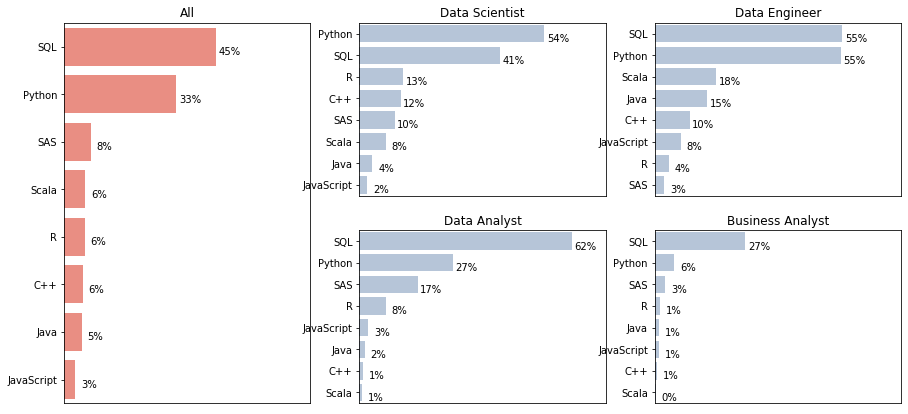

In [202]:
# Languages
languages = {"Python":["Python","python"],
             "R":[" R "," R."], 
             "SQL":["SQL"], 
             "Java":[" Java ", ".Java ", " Java."], 
             "JavaScript":["JavaScript"], 
             "Scala":["Scala"], 
             "C++":["C++"], 
             "SAS":["SAS"]}

category_lst = ['All', 'Data Scientist','Data Engineer','Data Analyst','Business Analyst']

lang = dict()
for job_category in category_lst:
    lang[job_category] = get_keyword_freq(df,job_category,languages)

freq_barchart_by_category(lang)

SQL, Python, R are the top 3 programming languages mentioned in job descriptions for all 4 data jobs.

For Data Scientist and Data Engineer, Python and SQL are the most popular, 40% ~ 55% of job postings have mentioned at least one of these two languages. R is an alternative to Python, but it is not as popular with only 20% ~ 30% of Data Scientist/Data Engineer jobs mentioning R.

For Data Analyst, 62% of job postings demanded the use of SQL, while only 20% ~ 30% mentioned Python or R.

In job postings of Business Analyst, programming languages do not seem to be as important as in other 3 job categories - less than 30% have mentioned SQL and 20% have mentioned R. Python, popular as in other job categories, has only been mentioned in 5% of the Business Analyst job postings.
